In [397]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt

In [398]:
"############### Parâmetros fixos ##############"

"############### chute inicial de temp. ##############"

T_f_ent_1 = 28 + 273.15
T_f_sai_chut_1 =  700 + 273.15 
T_f_sai_chut_5 = (T_f_sai_chut_1 - T_f_ent_1)/2 + T_f_ent_1
T_f_sai_chut_6 = T_f_sai_chut_1

T_q_ent_2 = 665 + 273.15
T_q_sai_chut_2 =  50 + 273.15
T_q_sai_chut_4 = (T_q_sai_chut_2 - T_q_ent_2)/3 + T_q_ent_2
T_q_sai_chut_5 = 2*(T_q_sai_chut_2 - T_q_ent_2)/3 + T_q_ent_2
T_q_sai_chut_6 = T_q_sai_chut_2

"############### chute inicial de comprimentos. ##############"

L_chut_5 = 0.6

L = 2

L_chut_4 = L/3

L_chut_5 = L*2/3


"############### parametros do trocador ##############"

L = 2
D = 76e-2
n_tubos = 19
P_T = 15e-2
B_chi = L / 8
d_i = 10e-2
d_e = d_i + 2.5e-3
A_i = np.pi * d_i 
A_e = np.pi * d_e
P_e_m = np.pi * d_e
A_i_t = (np.pi * d_i**2)/4
A_c_t = np.pi * D**2/4
k_aco = 401

"############### parâmetros de entrada dos flúidos ##############"

m_dot_f_eval = np.linspace(0.00005,0.0002,num=100)
m_dot_q = 0.0016
P_q = 101325
P_f = 101325

parameters_5 = {'q' : [],
                'D_P' : [],
                'epsilon' : [],
                'Re_D_i' : [],
                'h_i' : [],
                'T_q_sai' : [],
                'T_f_sai' : [],
                'L' : []}


parameters_4 = {'q' : [],
                'D_P' : [],
                'epsilon' : [],
                'Re_D_i' : [],
                'h_i' : [],
                'T_q_sai' : [],
                'T_f_sai' : [],
                'L' : []}


parameters_6 = {'q' : [],
                'D_P' : [],
                'epsilon' : [],
                'Re_D_i' : [],
                'h_i' : [],
                'T_q_sai' : [],
                'T_f_sai' : [],
                'L' : []}


In [399]:
"############### Volumes de Controle IV.V.VI ##############"

"parametros do fluido quente"

T_q_ent_kern = T_q_ent_2
T_med_q_kern = (T_q_ent_kern + T_q_sai_chut_5)/2
mu_q_kern = PropsSI('viscosity','P',P_q,'T',T_med_q_kern,'air')
Pr_q_kern = PropsSI('Prandtl','P',P_q,'T',T_med_q_kern,'air')
k_q_kern = PropsSI('conductivity','P',P_q,'T',T_med_q_kern,'air')
rho_kern = PropsSI('D','P',P_q,'T',T_med_q_kern,'air')


D_e_kern = (4*((P_T**2 * 3**(1/2))/4 - (np.pi * d_e**2)/8))/(np.pi * d_e/2)

C_kern = P_T - d_e

A_c = (D * C_kern * B_chi)/P_T

Re_c = (m_dot_q * D_e_kern)/(A_c * mu_q_kern)

h_e = (0.36 * k_q_kern)/D_e_kern * Re_c**0.55 * Pr_q_kern**(1/3)

f = Re_c/64

D_P = n_tubos*f*(m_dot_q/A_c)*(7)*D_e_kern/(2*rho_kern*D)

D_P_kern = [D_P for i in m_dot_f_eval]

In [400]:
"############### Volume de Controle IV ##############"

for counter, m_dot_f in enumerate(m_dot_f_eval):

    while True:

        A_i_4 = A_i *L_chut_4
        

        "parametros do fluido frio"

        T_f_ent_4 = T_f_ent_1
        T_f_sai_4 = 373.15
        T_med_f_4 = (T_f_ent_4 +T_f_sai_4) / 2
        c_p_f_4 = PropsSI('CPMASS','P',P_f,'T',T_med_f_4,'water')
        I_f_ent_4 = PropsSI('H','P',P_f,'T',T_f_ent_1,'water')
        I_f_sai_4 = PropsSI('H','P',P_f,'T',T_f_sai_4,'water')
        mu_f_4 = PropsSI('viscosity','P',P_f,'T',T_med_f_4,'water')
        Pr_f_4 = PropsSI('Prandtl','P',P_f,'T',T_med_f_4,'water')
        k_f_4 = PropsSI('conductivity','P',P_f,'T',T_med_f_4,'water')
        rho_f_4 = PropsSI('D','P',P_f,'T',T_med_f_4,'water')


        "parametros do fluido quente"

        T_q_ent_4 = T_q_ent_2
        T_med_q_4 = (T_q_ent_4 + T_q_sai_chut_4)/2
        c_p_q_4 = PropsSI('CPMASS','P',P_q,'T',T_med_q_4,'air')

        "Balanço de massas e energias"

        T_q_sai_4 = T_q_ent_4 - m_dot_f*c_p_f_4*(T_f_sai_4-T_f_ent_4)/(m_dot_q * c_p_q_4)

        q_4 = m_dot_q * c_p_q_4 * (T_q_ent_4 - T_q_sai_4)

        "calculo da efetividade"

        c_q_4 = m_dot_q * c_p_q_4
        c_f_4 = m_dot_f * c_p_f_4

        if c_q_4<c_f_4 :
            c_min_4 = c_q_4 
            c_max_4 = c_f_4

        else:
            c_min_4 = c_f_4
            c_max_4 = c_q_4

        c_r_4 = c_min_4/c_max_4

        q_max_4 = c_min_4 * (T_q_ent_4 - T_f_ent_4)

        epsilon_4 = q_4 / q_max_4

        if epsilon_4 >= 1:
            print(m_dot_f)
            break

        E_c_4 = ((2/epsilon_4) - (1 + c_r_4))/((1 + c_r_4**2)**(1/2))

        NUT_4 = -(1 + c_r_4**2)**(-1/2) * np.log((E_c_4 - 1)/(E_c_4 + 1))
    
        #NUT_4 = (c_r_4-1)**(-1) * np.log((epsilon_4 - 1)/(epsilon_4*c_r_4 - 1))

        "Numero de Reynolds"

        Re_D_i_4 = (m_dot_f*d_i)/(A_i_t*mu_f_4)


        "numero de Nusselt"

        if Re_D_i_4 >= 2300:

            f_f = 0.0375

            Nu_D_4 = ((f_f/8)*(Re_D_i_4-1e3)*Pr_f_4)/(1 + 12.7 * (f_f/8)**0.5 * (Pr_f_4**(2/3)-1))

        elif Re_D_i_4 >= 10000 and Pr_f_4 >= 0.6 and Pr_f_4 <= 160:
            
            Nu_D_4 = 0.023 * Re_D_i_4**(4/5) * Pr_f_4 * 0.4

        else:
            
            Nu_D_4 = 4.36


        "coeficiente de convecção interna"

        h_i_4 = (Nu_D_4*k_f_4)/(d_i)


        "coeficientes globais"

        R_d_i_4 = 0.0002
        R_d_e = 0.0009

        U_i_4 = (1/ h_i_4 + R_d_i_4 + d_i * n_tubos * (np.log(d_e/d_i))/
                (2 * k_aco ) + (d_i * R_d_e)/d_e + d_i * 1/(d_e * h_e))**(-1)


        "encontrando comprimento do volume de controle"

        L_4 = (NUT_4 * c_f_4)/( U_i_4 * A_i_4)

        
        "Queda de pressão"

        f_4 = Re_D_i_4/64

        vm_4_f = m_dot_f/(rho_f_4*A_i_t)

        D_P_4 = rho_f_4 * vm_4_f**2 * L_4 * n_tubos/(2*d_i)


        "############### parametros do loop ##############"

        error_q_4 = ((T_q_sai_chut_4 - T_q_sai_4)**2)**0.5

        T_q_sai_chut_4 = (T_q_sai_chut_4 + T_q_sai_4)/2


        if error_q_4 < (T_q_sai_4 * 0.01):
            break

    parameters_4['q'].append(q_4)
    parameters_4['D_P'].append(D_P_4)
    parameters_4['epsilon'].append(epsilon_4)
    parameters_4['Re_D_i'].append(Re_D_i_4)
    parameters_4['h_i'].append(h_i_4)
    parameters_4['T_q_sai'].append(T_q_sai_4)
    parameters_4['T_f_sai'].append(T_f_sai_4)
    parameters_4['L'].append(L_4)


In [401]:
"############### Volume de Controle V ##############"

for counter,(m_dot_f,T_q_sai_4) in enumerate(zip(m_dot_f_eval,parameters_4['T_q_sai'])):

 
    while True:

        A_i_5 = A_i * L_chut_5
        A_e_5 = A_e * L_chut_5

        "parametros do fluido frio"

        T_f_ent_5 = 373.15
        T_f_sai_5 = 373.15
        I_f_ent_5 = PropsSI('H','Q',0,'T',T_f_ent_5,'water')
        I_f_sai_5 = PropsSI('H','Q',1,'T',T_f_sai_5,'water')

        mu_f_a = PropsSI('viscosity','Q',0,'T',T_f_ent_5,'water')
        Pr_f_a = PropsSI('Prandtl','Q',0,'T',T_f_ent_5,'water')
        k_f_a = PropsSI('conductivity','Q',0,'T',T_f_ent_5,'water')
        c_p_f_a = PropsSI('CPMASS','Q',0,'T',T_f_ent_5,'water')
        I_f_a = PropsSI('H','Q',0,'T',T_f_ent_5,'water')
        rho_f_a = PropsSI('D','Q',0,'T',T_f_ent_5,'water')

        mu_f_v = PropsSI('viscosity','Q',1,'T',T_f_ent_5,'water')
        Pr_f_v = PropsSI('Prandtl','Q',1,'T',T_f_ent_5,'water')
        k_f_v = PropsSI('conductivity','Q',1,'T',T_f_ent_5,'water')
        c_p_f_v = PropsSI('CPMASS','Q',1,'T',T_f_ent_5,'water')
        I_f_v = PropsSI('H','Q',1,'T',T_f_ent_5,'water')
        rho_f_v = PropsSI('D','Q',0,'T',T_f_ent_5,'water')

        "parametros do fluido quente"

        T_q_ent_5 = T_q_sai_4
        T_med_q_5 = (T_q_ent_5 + T_q_sai_chut_5)/2
        c_p_q_5 = PropsSI('CPMASS','P',P_q,'T',T_med_q_5,'air')

        "parametros adicionais"

        mu_f_s_v = PropsSI('viscosity','Q',0,'T',647.096,'water')


        "Balanço de massas e energias"

        q_5 = m_dot_q * c_p_q_5 * (T_q_ent_5 - T_q_sai_chut_5)

        "calculo da efetividade"

        c_q_5 = m_dot_q * c_p_q_5

        c_min_5 = c_q_5 

        c_r_5 = 0

        q_max_5 = c_min_5 * (T_q_ent_5 - T_f_ent_5)

        epsilon_5 = q_5 / q_max_5

        T_q_sai_5 = T_q_ent_5 - q_max_5 * epsilon_5/(m_dot_q * c_p_q_5)

        if epsilon_5 >= 1:
            print(m_dot_f)
            break

        NUT_5 = -np.log(1-epsilon_5)



        "Numero de Reynolds"

        Re_D_i_5_v = (m_dot_f*d_i)/(A_i_t*mu_f_v)

        Re_D_i_5_a = (m_dot_f*d_i)/(A_i_t*mu_f_a)



        "Calculo do coeficiente convectivo"

        q_s_flux = q_5/(A_i_5)

        x = np.linspace(0,L_chut_5,num=100)

        X_eval = (q_s_flux * np.pi * d_i * x)/(m_dot_f*(I_f_v-I_f_a))

        G_s_f = 1

        Fr = ((m_dot_f/A_i_t)**2 / rho_f_a)/(10*d_i)

        if Fr >= 0.04:
            f_Fr =1

        else:
            f_Fr = 2.63*Fr**0.3



        "numero de Nusselt"

        if Re_D_i_5_v >= 2300:

            f_f = 0.0375

            Nu_D_v = ((f_f/8)*(Re_D_i_5_v-1e3)*Pr_f_v)/(1 + 12.7 * (f_f/8)**0.5 * (Pr_f_v**(2/3)-1))

        elif Re_D_i_5_v >= 10000 and Pr_f_v >= 0.6 and Pr_f_v <= 160:
            
            Nu_D_v = 0.023 * Re_D_i_5_v**(4/5) * Pr_f_v * 0.4

        else:
            
            Nu_D_v = 4.36


        "coeficiente de convecção interna"

        h_mf = (Nu_D_v*k_f_v)/(d_i)

        aux = []

        for X in X_eval:


            if (X > 0) and (X <= 0.8):

                aux.append((1.136*(rho_f_a/rho_f_v)**0.45 * X**0.72 * (1-X)**0.08 * f_Fr +
                667*(q_s_flux/((m_dot_f/A_i_t)*(I_f_v-I_f_a)))**0.7 * (1-X)**0.8 * G_s_f))

            else:

                r = 0.6683*((rho_f_a/rho_f_v)**0.1) * X**0.16 * (1-X)**0.64 * f_Fr + 1058*((q_s_flux/((m_dot_f/A_i_t)*(I_f_v-I_f_a)))**0.7) * (1-X)**0.8 * G_s_f

                if np.isnan(r) == True:
                    aux.append(0)
                
                else:
                    aux.append(r)


        h_i_5 = np.mean(aux) * h_mf


        "coeficientes globais"

        R_d_i_5 = 0.0002

        U_e_5 = (d_e/(d_i*h_i_5) + R_d_i_5 * d_e /d_i + d_e * n_tubos * (np.log(d_e/d_i))/(2 * k_aco ) + 
                R_d_e + 1/h_e)**(-1)


        "encontrando comprimento do volume de controle"

        L_5 = (NUT_5 * c_q_5)/(U_e_5 * A_e_5)


        "Queda de pressão"

        f_5 = Re_D_i_5_v/64

        vm_5_f = m_dot_f/(rho_f_v*A_i_t)

        D_P_5 = rho_f_v * vm_5_f**2 * L_5 * n_tubos/(2*d_i)

        "############### parametros do loop ##############"


        error_L_5 = ((L_chut_5 - L_5)**2)**0.5

        L_chut_5 = (L_chut_5 + L_5)/2

        if error_L_5 < (L_5 * 0.01):
            break

    parameters_5['q'].append(q_5)
    parameters_5['D_P'].append(D_P_5)
    parameters_5['epsilon'].append(epsilon_5)
    parameters_5['Re_D_i'].append(Re_D_i_5_v)
    parameters_5['h_i'].append(h_i_5)
    parameters_5['T_q_sai'].append(T_q_sai_5)
    parameters_5['T_f_sai'].append(T_f_sai_5)
    parameters_5['L'].append(L_5)


/home/thiago/yes/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:130: RuntimeWarning: invalid value encountered in double_scalars


In [402]:
"############### Volume de Controle VI ##############"

for m_dot_f,T_q_sai_5 in zip(m_dot_f_eval,parameters_5['T_q_sai']):

    while True:

        L_6 = L - (L_4 + L_5)

        A_i_6 = A_i * L_6

        "parametros do fluido frio"

        T_f_ent_6 = 373.15
        T_q_sai_6 = T_q
        T_med_f_6 = (T_f_ent_6 + T_f_sai_chut_6) / 2
        c_p_f_6 = PropsSI('CPMASS','P',P_f,'T',T_med_f_6,'water')
        I_f_ent_6 = PropsSI('H','P',P_f,'T',T_f_ent_6,'water')
        I_f_sai_6 = PropsSI('H','P',P_f,'T',T_f_sai_chut_6,'water')
        mu_f_6 = PropsSI('viscosity','P',P_f,'T',T_med_f_6,'water')
        Pr_f_6 = PropsSI('Prandtl','P',P_f,'T',T_med_f_6,'water')
        k_f_6 = PropsSI('conductivity','P',P_f,'T',T_med_f_6,'water')


        "parametros do fluido quente"

        T_q_ent_6 = T_q_sai_5
        T_med_q_6 = (T_q_ent_6 + T_q_sai_chut_6)/2
        c_p_q_6 = PropsSI('CPMASS','P',P_q,'T',T_med_q_6,'air')


        "parametros adicionais"

        mu_f_s_6 = PropsSI('viscosity','P',P_f,'T',T_med_f_6,'water')


        "Balanço de massas e energias"

        q_6 = m_dot_f * c_p_f_6 * (T_f_ent_6 - T_f_sai_chut_6)

        "calculo da efetividade"

        c_q_6 = m_dot_q * c_p_q_6
        c_f_6 = m_dot_f * c_p_f_6

        if (c_q_6<c_f_6) : 
            c_min_6 = c_q_6 
            c_max_6 = c_f_6

        else: 
            c_min_6 = c_f_6
            c_max_6 = c_q_6


        c_r_6 = c_min_6/c_max_6

        q_max_6 = c_min_6 * (T_q_ent_6 - T_f_ent_6)

        epsilon_6 = q_6 / q_max_6
   
        T_f_sai_6 = T_f_ent_6 - q_max_6 * epsilon_6/(m_dot_f * c_p_f_6)


        #NUT_6 = (c_r_6 - 1)*np.log((epsilon_6-1)/(epsilon_6*c_r_4-1))

        e_c_6 = (2/epsilon_6 - 1 + c_r_6)/(1 + c_r_6**2)**(1/2)

        NUT_6 = -(1 + c_r_6**2)**(-1/2) * np.log((e_c_6 - 1)/(e_c_6 + 1))

        "Numero de Reynolds"

        Re_D_i_6 = (m_dot_f*d_i)/(A_i_t*mu_f_6)

        "numero de Nusselt"

        if Re_D_i_6 >= 2300:

            f_f = 0.0375

            Nu_D_6 = ((f_f/8)*(Re_D_i_6-1e3)*Pr_f_6)/(1 + 12.7 * (f_f/8)**0.5 * (Pr_f_6**(2/3)-1))

        elif Re_D_i_6 >= 10000 and Pr_f_6 >= 0.6 and Pr_f_6 <= 160:
            
            Nu_D_6 = 0.023 * Re_D_i_6**(4/5) * Pr_f_6 * 0.4

        else:
            
            Nu_D_6 = 4.36

        "coeficiente de convecção interna"

        h_i_6 = (Nu_D_6*k_f_6)/(d_i)

        "coeficientes globais"

        R_d_i_6 = 0.0002

        U_i_6 = (1/h_i_6 + R_d_i_6 + d_i * n_tubos * (np.log(d_e/d_i))/(2 * k_aco) + 
                (d_i/d_e) * R_d_e + d_i/(d_e * h_e))**(-1)


        "Queda de pressão"

        f_6 = Re_D_i_6/64

        vm_6_f = m_dot_f/(rho_f_v*A_i_t)

        D_P_6 = rho_f_v * vm_6_f**2 * L_6 * n_tubos/(2*d_i)


        "############### parametros do loop ##############"

        error_q_6 = ((T_q_sai_chut_6 - T_q_sai_6)**2)**0.5
        error_f_6 = ((T_f_sai_chut_6 - T_f_sai_6)**2)**0.5

        T_q_sai_chut_6 = (T_q_sai_chut_6 + T_q_sai_6)/2
        T_f_sai_chut_6 = (T_f_sai_chut_6 + T_f_sai_6)/2


        if (error_q_6 < (T_q_sai_6 * 0.01)) and (error_f_6 < (T_f_sai_6 * 0.01)):
            break

            
    parameters_6['q'].append(q_6)
    parameters_6['D_P'].append(D_P_6)
    parameters_6['epsilon'].append(epsilon_6)
    parameters_6['Re_D_i'].append(Re_D_i_6)
    parameters_6['h_i'].append(h_i_6)
    parameters_6['T_q_sai'].append(T_q_sai_6)
    parameters_6['T_f_sai'].append(T_f_sai_6)
    parameters_6['L'].append(L_6)


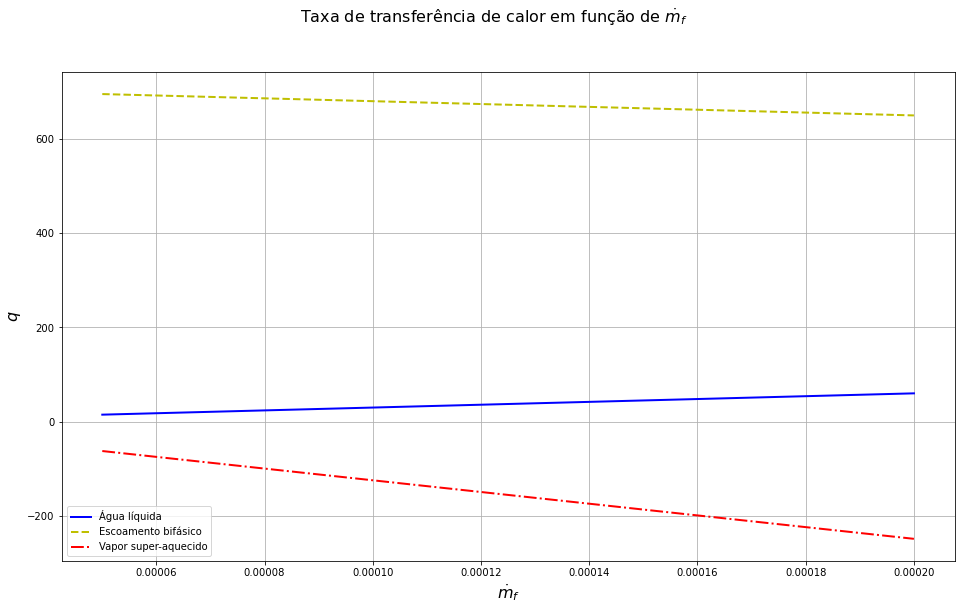

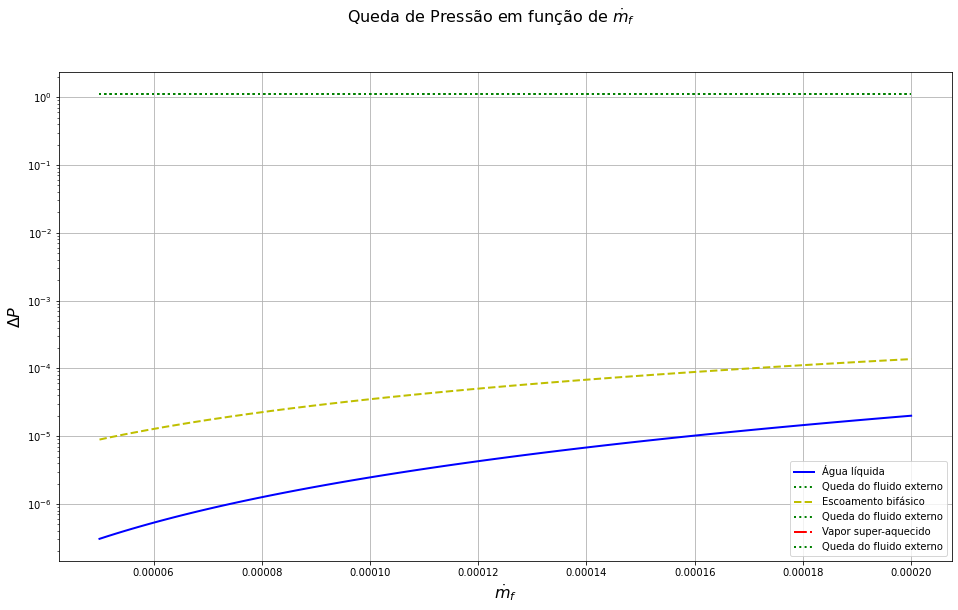

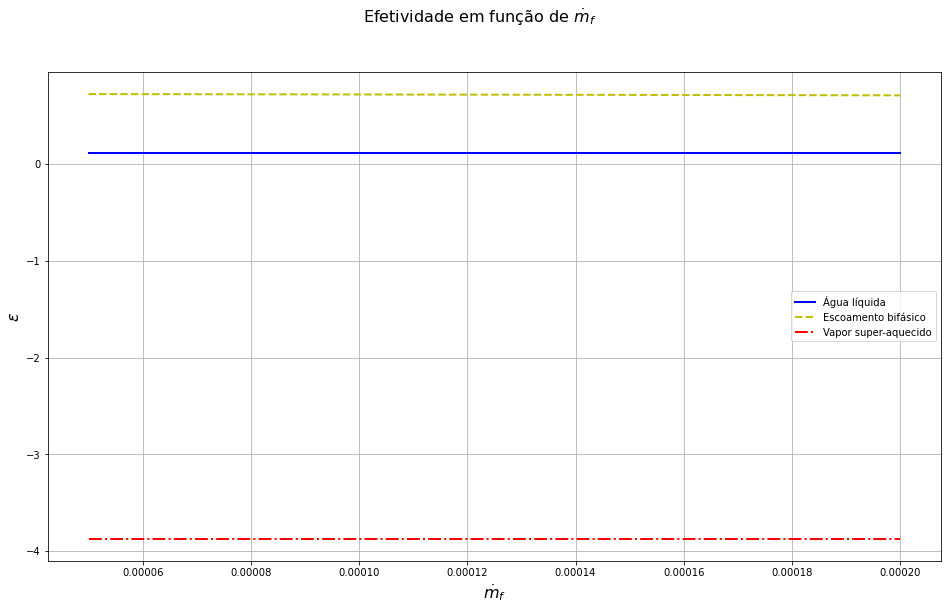

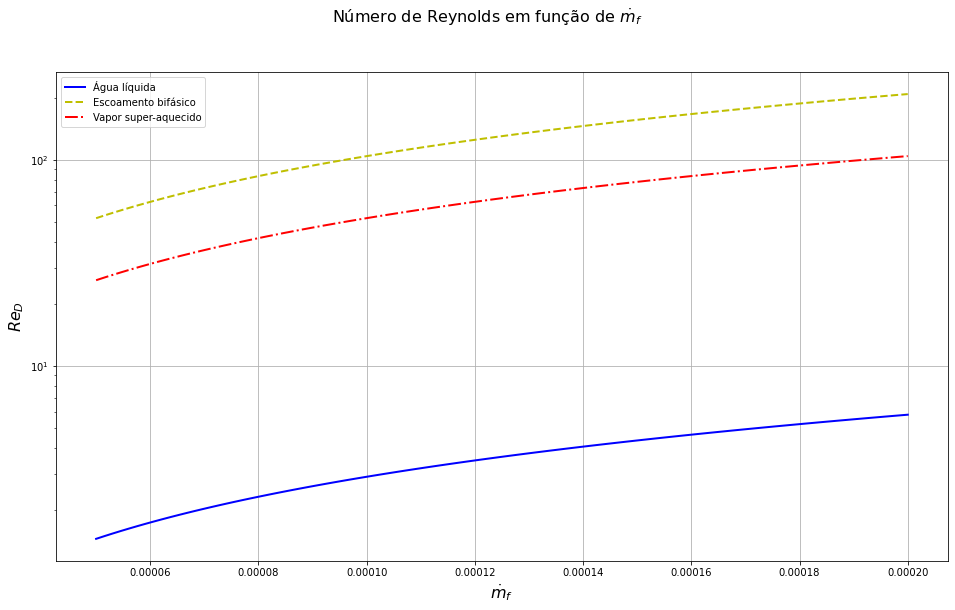

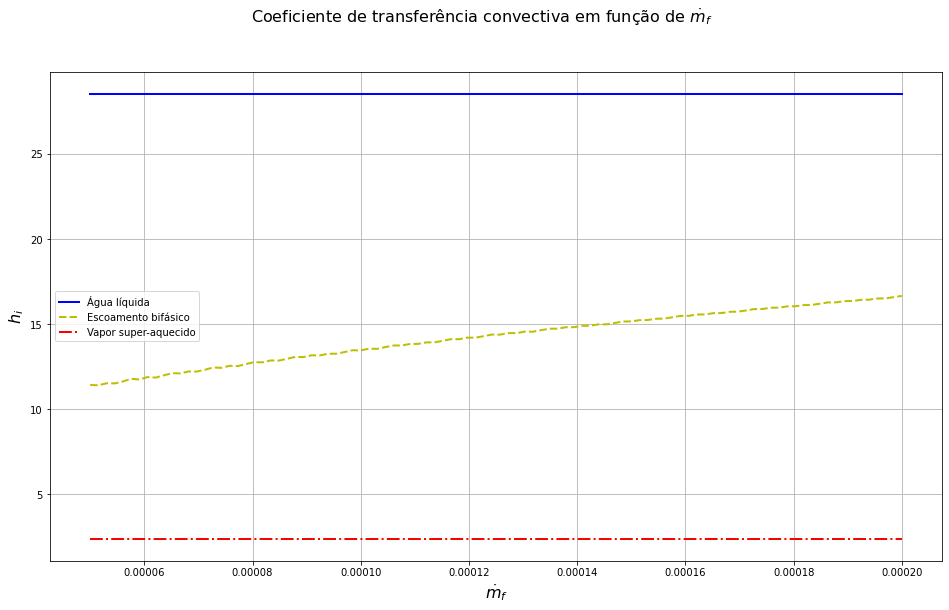

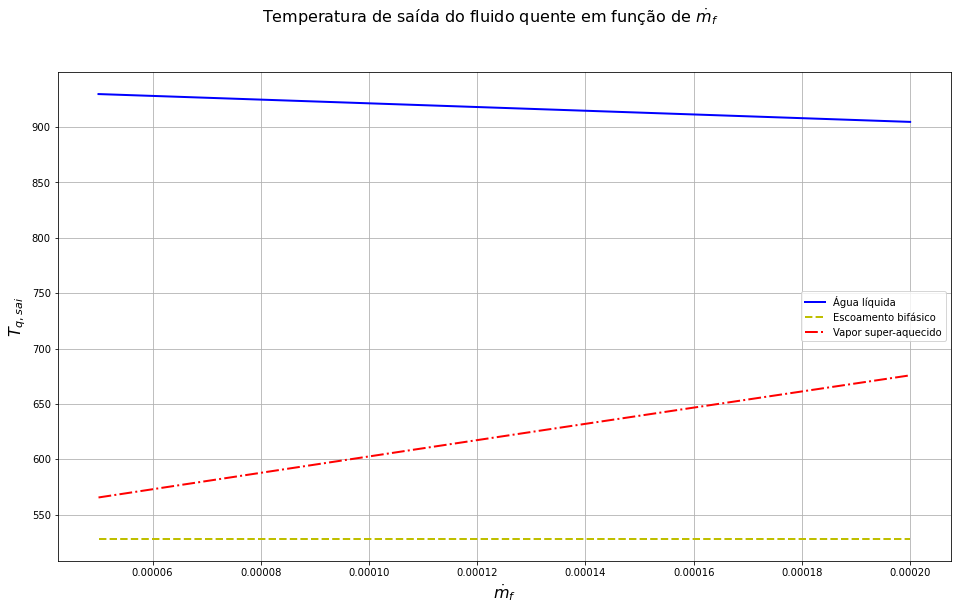

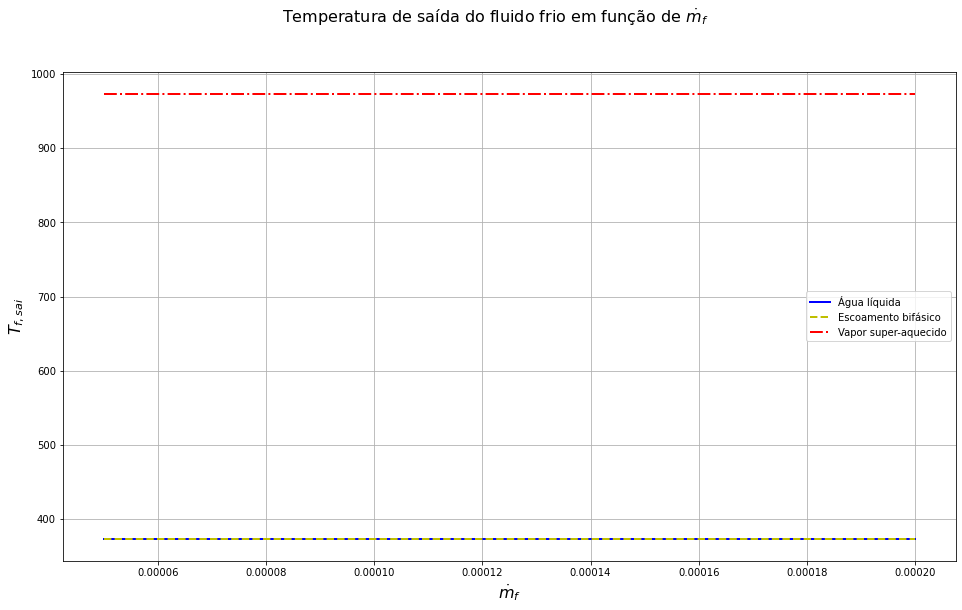

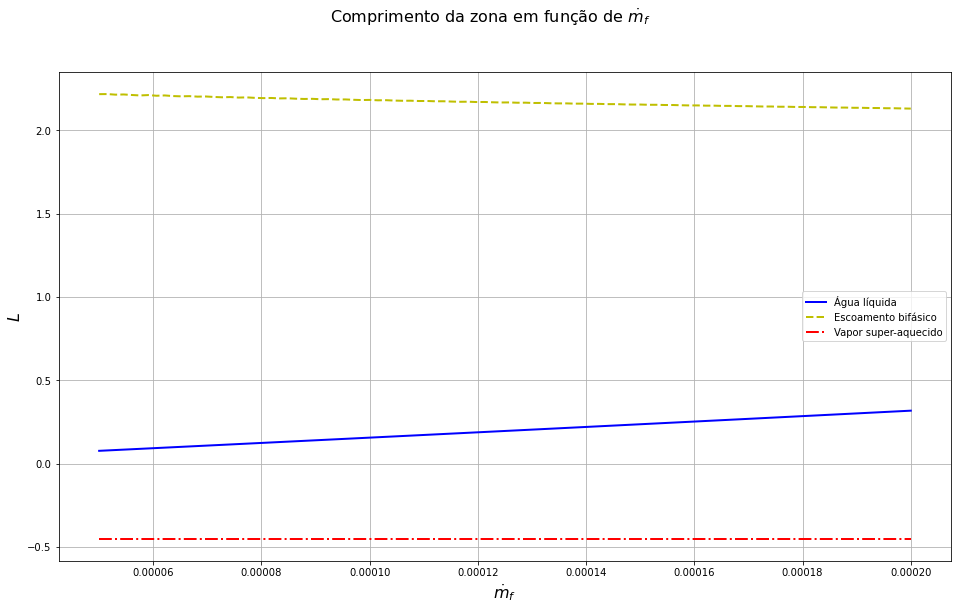

In [403]:
parameters = parameters_4.keys()

zones = [
    parameters_4,
    parameters_5,
    parameters_6
]

z_names =[
    'Água líquida',
    'Escoamento bifásico',
    'Vapor super-aquecido'
]

colors = [
    'b',
    'y',
    'r'
]

styles = [
    '-',
    '--',
    '-.'
]

names = [
    'Taxa de transferência de calor',
    'Queda de Pressão',
    'Efetividade',
    'Número de Reynolds',
    'Coeficiente de transferência convectiva',
    'Temperatura de saída do fluido quente',
    'Temperatura de saída do fluido frio',
    'Comprimento da zona'
]

symbols = [
    '$q$',
    '$\Delta P$',
    '$\epsilon$',
    '$Re_D$',
    '$h_i$',
    '$T_{q,sai}$',
    '$T_{f,sai}$',
    '$L$'
]

for parameter, name , symbol in zip(parameters,names,symbols):

    fig = plt.figure(figsize=[16,9])

    fig.suptitle((name + ' em função de $\dot{m}_f$'), fontsize=16)

    ax = fig.add_subplot(1, 1, 1)

    ax.set_xlabel('$\dot{m}_f$',fontsize=16)
    
    ax.set_ylabel(symbol,fontsize=16)

    #plt.yscale("log")
    
    for zone,z_name,color,style in zip(zones,z_names,colors,styles):

        ax.plot(m_dot_f_eval,zone[parameter],color, linewidth=2,linestyle=style,label = z_name)

        if name == 'Queda de Pressão':

            ax.plot(m_dot_f_eval,D_P_kern,'g', linewidth=2,linestyle=':',label = 'Queda do fluido externo')

            plt.yscale("log")

        elif name == 'Número de Reynolds':

            plt.yscale("log")


        ax.grid()

        ax.legend()

    plt.show()

    fig.savefig('plots/' + name + '.png', bbox_inches='tight')

    del fig
    del ax
    plt.close()
